## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).
8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.
11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).
15. **Team Contributions:** Document each team member's specific contributions related to the questions above.
16. **Link** to the public GitHub repository.

\newpage

1.

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:

df = pd.read_csv('kidney_disease.csv')
print(df.shape)
df.head()

(400, 26)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [177]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

Our primary objective is to determine if an individual has chronic kidney disease (CKD), leveraging a range of health-related attributes (including 25 features)  to predict the likelihood of CKD development.

2.

In [178]:
df = df.drop(columns=['id'], axis=1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [179]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [180]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [181]:
float64_cols = df.select_dtypes(include=['float64']).columns
object_cols = df.select_dtypes(include=['object']).columns
print(float64_cols)
print(object_cols)

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'], dtype='object')
Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [182]:
str_to_bi = {
    'rbc':{'normal':1,'abnormal':0},
    'pc':{'normal':1,'abnormal':0},
    'pcc':{'present':1,'notpresent':0},
    'ba':{'present':1,'notpresent':0},
    'htn':{'yes':1,'no':0},
    'dm':{'yes':1,'no':0},
    'cad':{'yes':1,'no':0},
    'appet':{'good':1,'poor':0},
    'pe':{'yes':1,'no':0},
    'ane':{'yes':1,'no':0},
    'classification':{'ckd': 1, 'notckd': 0}
}
for column, mapping in str_to_bi.items():
    df[column] = df[column].replace(mapping)

In [183]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [184]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
scaler =  StandardScaler()
df[float64_cols] = scaler.fit_transform(df[float64_cols])

In [185]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,NaN,1.0,0.0,0.0,-0.341498,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.613295,0.258373,-1.297699,0.727772,2.323069,1.0,1.0,0.0,0.0,3.473064,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1.0,0.0,1.0,0.0,-0.392022,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1.0,1.0,0.0,0.0,-0.530963,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


Initially, we opt to exclude the variable id from the dataset, as it lacks pertinent information for our analysis or modeling.
Moreover, upon inspection of the output, we note a mixture of numerical and categorical features, with a majority of the categorical features being binary. Hence, for the sake of simplifying data representation and analysis, we propose transforming these binary features into numeric representations, utilizing the values 0 and 1. This transformation is executed with careful consideration of the original significance of each category within the respective binary features. For instance, in the rbc variable, we encode the category 'normal' as 1 and 'abnormal' as 0.
Lastly, to ensure uniformity in feature scales, we apply standardization to all numerical features.

3.

In [186]:
print(df.shape)
df.dtypes

(400, 25)


age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [187]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,391.0,NaN,NaN,NaN,0.0,1.001281,-2.885708,-0.553039,0.205078,0.759087,2.246163
bp,388.0,NaN,NaN,NaN,-0.0,1.001291,-1.936857,-0.47337,0.258373,0.258373,7.575807
sg,353.0,NaN,NaN,NaN,0.0,1.001419,-2.173584,-1.297699,0.454071,0.454071,1.329955
al,354.0,NaN,NaN,NaN,0.0,1.001415,-0.752868,-0.752868,-0.752868,0.727772,2.948733
su,351.0,NaN,NaN,NaN,0.0,1.001428,-0.410106,-0.410106,-0.410106,-0.410106,4.145186
rbc,248.0,NaN,NaN,NaN,0.810484,0.392711,0.0,1.0,1.0,1.0,1.0
pc,335.0,NaN,NaN,NaN,0.773134,0.419431,0.0,1.0,1.0,1.0,1.0
pcc,396.0,NaN,NaN,NaN,0.106061,0.308305,0.0,0.0,0.0,0.0,1.0
ba,396.0,NaN,NaN,NaN,0.055556,0.229351,0.0,0.0,0.0,0.0,1.0
bgr,356.0,NaN,NaN,NaN,-0.0,1.001407,-1.591967,-0.61938,-0.341498,0.189004,4.319341


classification
1    250
0    150
Name: count, dtype: int64


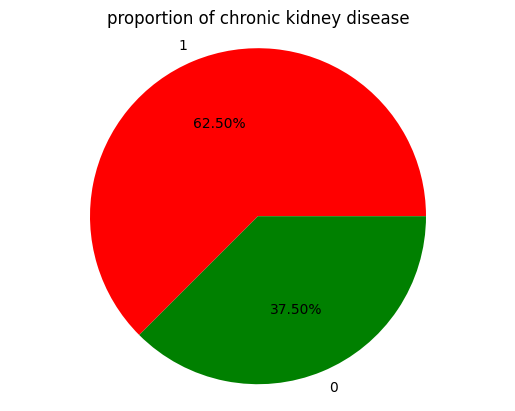

In [188]:
class_counts = df['classification'].value_counts()  
print(class_counts)
classes = class_counts.index  
frequencies = class_counts.values   
colors = ['red', 'green']  
plt.pie(frequencies, labels=classes, autopct='%1.2f%%', colors=colors)  
plt.axis('equal')  
plt.title('proportion of chronic kidney disease') 
plt.show()

First, The dataset comprises 400 observations and 25 columns, featuring 24 distinct attributes and one target variable, class, denoting the presence or absence of chronic kidney disease.   
Second,  there are two types in the dataset's features: float(float64) and String(object),including Age (age), Blood Pressure (bp), Specific Gravity (sg), Albumin (al), Sugar (su), Red Blood Cells (rbc), Pus Cell (pc), Pus Cell Clumps (pcc), Bacteria (ba), Blood Glucose Random (bgr), Blood Urea (bu), Serum Creatinine (sc), Sodium (sod), Potassium (pot), Hemoglobin (hemo), Packed Cell Volume (pcv), White Blood Cell Count (wc), Red Blood Cell Count (rc), Hypertension (htn), Diabetes Mellitus (dm), Coronary Artery Disease (cad), Appetite (appet), Pedal Edema (pe), and Anemia (ane).  
Third, the pie chart  above illustrates that roughly 62.50% of the observations indicate the presence of chronic kidney disease.

4.

(400, 11)


Text(0.5, 1.0, 'Correlation Heatmap of Float Features')

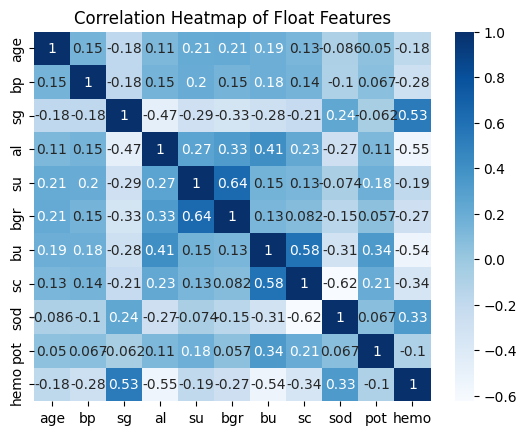

In [189]:
float64_df = df[float64_cols].apply(lambda x: x.fillna(x.mean()), axis=0)
print(float64_df.shape)
float64_df.head()
correlation_matrix = float64_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Float Features')

Variables bgr and su exhibit a strong positive correlation of 0.64, indicating that as the sugar content increases, there is a corresponding tendency for blood glucose random levels to rise.  
Additionally, variables sc and bu demonstrate a positive correlation of 0.58, suggesting that patients with higher blood urea levels may also have elevated serum creatinine levels.  
Furthermore, variables sod and sc display a significant negative correlation of -0.62. This indicates that as serum creatinine levels decrease, there is a notable tendency for sodium levels to increase.  

5.

In [190]:
missings = df.isnull().sum()
print(missings)

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [191]:
# drop all missing values
df_withoutNa = df.dropna()
df_withoutNa.shape

(158, 25)

In [192]:
# Fill missing values with mean value.
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')
mean = df[float64_cols].mean()
df[float64_cols] = df[float64_cols].fillna(mean)
mode = df.mode().iloc[0]
df[object_cols] = df[object_cols].fillna(mode) 
print(df.shape)
missings = df.isnull().sum()
print(missings)

(400, 25)
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


Initially, we opt to exclude the variable id from the dataset, as it lacks pertinent information for our analysis or modeling.
Moreover, upon inspection of the output, we note a mixture of numerical and categorical features, with a majority of the categorical features being binary. Hence, for the sake of simplifying data representation and analysis, we propose transforming these binary features into numeric representations, utilizing the values 0 and 1. This transformation is executed with careful consideration of the original significance of each category within the respective binary features. For instance, in the rbc variable, we encode the category 'normal' as 1 and 'abnormal' as 0.
Lastly, to ensure uniformity in feature scales, we apply standardization to all numerical features.

6.

In [193]:
from scipy import stats

In [194]:
float_df = df[float64_cols]
z_scores = np.abs(stats.zscore(float_df))
outliers = np.where(z_scores > 3)
outliers

(array([  2,   6,   6,   7,   7,  10,  10,  11,  21,  21,  27,  53,  56,
         61,  61,  61,  67,  69,  70,  86,  98,  99,  99, 103, 107, 122,
        128, 130, 140, 143, 145, 145, 148, 153, 158, 168, 170, 170, 180,
        193, 211, 212, 225, 225, 238, 244, 246, 248, 249, 249], dtype=int64),
 array([ 5,  7,  8,  4,  5,  4,  5,  5,  7,  8,  4,  4,  4,  6,  7,  9,  5,
         4,  4,  5,  1,  1,  4,  6,  4,  6,  9,  6,  4,  4,  3,  6,  7,  6,
         5,  4,  4,  5,  4,  6,  1,  4,  4,  5,  6,  5,  6,  5,  6, 10],
       dtype=int64))

In [195]:
df_without_outliers = df[(z_scores < 3).all(axis = 1)]
df_without_outliers.shape

(361, 25)


We use z-scores to determine outliers. When z-scores are greater than 3, we consider them outliers and remove them to avoid affecting subsequent models



7.

In [196]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.cluster import KMeans

In [197]:
df_without_outliers.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,1.0,1.0,0.0,0.0,-3.414983e-01,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,1.0,1.0,0.0,0.0,-1.796316e-16,...,38.0,6000.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1.0,0.0,1.0,0.0,-3.920223e-01,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1.0,1.0,0.0,0.0,-5.309633e-01,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
5,0.496661,0.990117,-0.421814,1.468092,-0.410106,1.0,1.0,0.0,0.0,-9.351554e-01,...,39.0,7800.0,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1


In [198]:
X=df_without_outliers.drop('classification',axis=1)
y = df_without_outliers['classification']

In [199]:
pca_X=PCA()
pca_loadings=pd.DataFrame(pca_X.fit(X).components_.T, index=X.columns)
pca_loadings

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
age,0.000039,0.025132,0.604360,-0.670356,0.231947,-0.024345,-0.145562,0.256495,0.120703,-0.034007,...,-1.048601e-01,0.004624,-0.016594,1.306690e-02,-0.029234,-0.004859,-0.006412,0.003483,0.002328,-0.009461
bp,0.000019,0.027071,0.299271,-0.011718,-0.905237,0.132439,-0.184218,-0.067330,0.102200,-0.091434,...,-1.057955e-02,0.022429,-0.012438,-5.188135e-02,-0.062398,-0.040619,0.006678,0.012785,-0.014105,-0.008468
sg,-0.000089,-0.061686,-0.302583,-0.403611,-0.053177,0.709511,0.428842,-0.073294,0.091794,-0.149843,...,1.196835e-02,0.036212,-0.052362,2.759978e-02,-0.036182,0.034754,-0.030515,0.024071,0.010127,0.026488
al,0.000101,0.054373,0.298421,0.519152,0.135922,0.371039,0.129107,0.396318,0.416173,0.103785,...,-1.261332e-01,-0.167548,-0.120041,2.963224e-04,-0.047099,-0.043291,0.029296,0.044685,-0.041844,-0.049924
su,0.000050,0.013825,0.250088,0.034643,-0.092697,-0.071446,0.447606,-0.080729,-0.125027,0.462732,...,1.260125e-02,0.000477,0.027094,-1.170055e-02,0.131128,-0.072656,-0.176748,-0.052172,-0.073617,0.009220
rbc,-0.000006,-0.010291,-0.037052,-0.086642,0.015220,-0.055005,0.005314,-0.083746,-0.035956,0.019046,...,9.292443e-02,-0.520608,0.172296,-3.428930e-01,-0.578469,0.205746,-0.163436,0.040047,-0.013931,-0.297606
pc,-0.000017,-0.018161,-0.069924,-0.118638,-0.039131,-0.076110,0.006950,-0.061262,-0.158563,0.060773,...,-4.234191e-01,-0.252238,-0.337850,-1.635282e-01,0.016767,-0.150652,0.184817,0.025132,0.092877,0.520300
pcc,0.000020,0.008339,0.044608,0.048225,0.025829,-0.003143,-0.002283,0.050542,0.110126,-0.019353,...,4.628122e-01,-0.164949,0.116592,4.540702e-03,-0.227625,0.051242,0.084807,0.191430,-0.185212,0.709764
ba,0.000007,0.005043,0.037446,0.055694,0.000924,0.019386,0.010795,0.030036,0.076672,0.043428,...,1.452701e-01,0.004347,-0.052105,-9.891005e-02,-0.089305,0.054669,-0.007435,-0.296108,0.902125,0.111637
bgr,0.000040,0.023851,0.288770,0.074863,-0.036368,-0.211195,0.627039,-0.157883,-0.215078,-0.150715,...,-1.539036e-01,-0.005816,0.073140,-5.463268e-02,-0.094042,0.012408,-0.006513,-0.004307,0.014610,0.037917


In [200]:
pc_scores=pd.DataFrame(pca_X.fit_transform(X),index=X.index)
pc_scores.head()


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-954.573566,-3.409880,0.331950,0.039248,-0.315034,0.189961,0.140593,0.057491,0.239911,-0.244865,...,0.540334,-0.064437,0.065790,0.279624,0.135553,0.017565,0.077197,-0.034108,0.077059,-0.025357
1,-2754.568320,3.970022,-1.906385,2.688679,1.210199,0.436795,1.464803,0.798090,0.715874,0.113537,...,-0.258055,-0.467404,-0.492354,-0.057071,-0.119143,0.063356,-0.015993,0.018610,-0.167300,-0.069781
3,-2054.563361,9.912063,1.004531,2.521418,1.365088,-0.437139,-0.724221,0.650579,0.971036,-1.553337,...,-0.211987,-0.627852,0.809236,-0.015444,-0.118318,-0.029879,-0.008791,0.505105,-0.166461,0.167776
4,-1454.566295,6.092356,-0.097759,0.594017,-0.201928,-0.939786,-0.644195,0.534008,0.802957,0.174713,...,-0.349137,-0.195973,-0.339120,-0.142761,-0.149148,-0.050731,-0.005765,-0.043594,-0.144836,-0.099992
5,-954.569385,1.819926,1.127304,0.485321,-0.456900,0.321800,-0.588910,0.498738,1.450887,0.080295,...,-0.043504,0.272804,0.042646,-0.060289,-0.328946,-0.290020,-0.096543,0.444873,0.075876,0.005303


In [201]:
kmeans = KMeans(n_clusters=2, n_init=20, random_state=0)
kmeans.fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,

In [202]:
pd.Series(kmeans.labels_).value_counts()

0    210
1    151
Name: count, dtype: int64

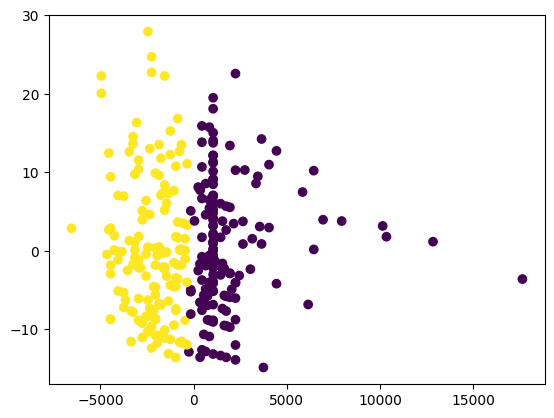

In [203]:
plt.scatter(pc_scores[0],pc_scores[1],c=kmeans.labels_)

In this step, employing K-means clustering and PCA, it's evident that two subgroups of the data are  separated and prominently labeled in yellow and purple on the chart.

8.

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,  y,  test_size=0.3,
    random_state=1)

9.

We decide to choose logistic regression classifier and Random Forest.  
**Logistic regression classifier**: This method furnishes interpretable coefficients that directly convey the impact of each feature in terms of odds ratios, facilitating the understanding of feature effects.  
**Random Forest**: Random forests excel at capturing intricate feature interactions without necessitating extensive feature engineering, owing to their inherent ability to model non-linear relationships.

10.

The evaluation metrics used to assess the model's performance encompass four key measures: Precision, Recall, F1-score, and Accuracy. Precision quantifies the proportion of predicted positive cases that are genuinely positive. Recall gauges the proportion of actual positive cases that are accurately predicted. F1-score, as the harmonic mean of precision and recall, provides a balanced measure between these two metrics.   
Accuracy represents the proportion of instances in the dataset that are classified correctly.   
For this dataset, we focus on utilizing F1-score and accuracy as our primary evaluation metrics.

11.
12.

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


In [218]:
#logisticRegression model 
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
#make prediction
y_pred_log = log_model.predict(X_test)
#evaluate
print(f'Logistic Regression accuracy score: {accuracy_score(y_test, y_pred_log):.5f}') 
print(f'Logistic Regression F1 score: {f1_score(y_test, y_pred_log):.5f}')


Logistic Regression accuracy score: 0.99083
Logistic Regression F1 score: 0.99225


In [221]:
#RandomForest model 
random_forest_model = RandomForestClassifier(random_state=1)
random_forest_model.fit(X_train, y_train)
#make prediction
y_pred_rf = random_forest_model.predict(X_test)
#evaluate
print(f'Random Forest accuracy score: {accuracy_score(y_test, y_pred_rf):.5f}') 
print(f'Random Forest F1 score: {f1_score(y_test, y_pred_rf):.5f}')

Random Forest accuracy score: 1.00000
Random Forest F1 score: 1.00000


In [223]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn import metrics

np.sqrt(metrics.mean_squared_error(y_test, y_pred_log))

0.09578262852211514

d:\development\python\python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\development\python\python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

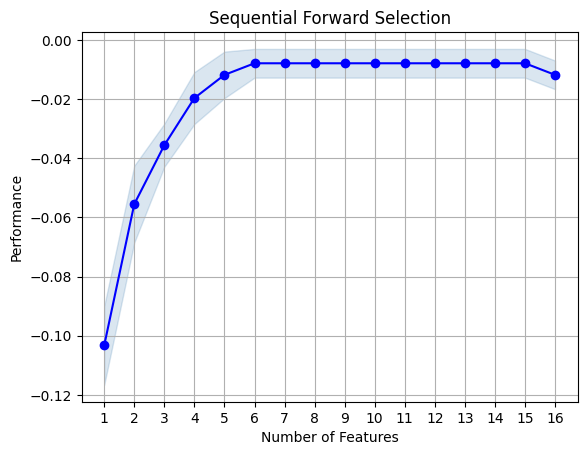

In [229]:
sfs = SFS(
    log_model,
    k_features=(1,16),
    forward=True,
    floating=False,
    scoring='neg_mean_squared_error',
    cv=5
    )

sfs = sfs.fit(X_train, y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [231]:
print(X_train.columns[list(sfs.k_feature_idx_)])

# Prediction again
sel_col = X_train.columns[list(sfs.k_feature_idx_)]
X_train_sfs = X_train[sel_col]
X_test_sfs = X_test[sel_col]
sfs_m = LogisticRegression()
sfs_m.fit(X_train_sfs, y_train)
sfs_test = sfs_m.predict(X_test_sfs)
np.sqrt(metrics.mean_squared_error(y_test, sfs_test))

Index(['sg', 'al', 'hemo', 'rc', 'appet', 'pe'], dtype='object')


0.1659003790827993

Upon comparison, it appears that Random Forest outperforms Logistic Regression from Accuracy and F1-score. Accuracy of Logistic Regression model is 0.99083 and F1-score is 0.99225 while Accuracy and F1-score of Random Forest are both 1.00000.
However, the 100% accuracy rate suggests that the Random Forest model may be overfitting the training data.

Then we employ the stepwise selection method to enhance the logistic regression classifier. Through verification, we find that this approach reduces the mean squared error (MSE), indicating potential performance improvement for the classifier. 

13.

In [236]:
feature_effect = pd.DataFrame(log_model.coef_[0], index=X_train.columns, columns=['Coefficient'])
feature_effect.sort_values(by='Coefficient', ascending=False)

,Coefficient
al,1.752082
htn,0.926034
bgr,0.853137
dm,0.799968
bu,0.630571
sc,0.573461
pe,0.540684
bp,0.500789
ane,0.391952
rc,0.326039


It can be seen from the result:  
There is indeed a relationship between Albumin(al) and chronic kidney disease (CKD). Albumin is the most important protein in human plasma, which is synthesized by the liver and has the important functions of maintaining the body's nutrition and osmotic pressure, and participating in the body's tissue repair and metabolism. At the same time, albumin is also an important index reflecting liver synthesis function in clinical liver function biochemical tests.

And Blood glucose random levels (bgr) also suggests that elevated glucose levels serve as a predictor of CKD. This finding aligns with the well-established link between diabetes, a leading cause of CKD, and high blood sugar levels, which can progressively damage the kidneys over time.  

The negative coefficient associated with sodium levels (sod) suggests that elevated serum sodium concentrations are linked with a reduced likelihood of chronic kidney disease (CKD). This observation implies that lower sodium levels may serve as an indicator of kidney dysfunction, potentially indicating issues with the kidneys' ability to regulate minerals and electrolytes.

15.

Each team member made his or her own contribution to the completion of the assignment, and we consider that contribution equally important:  
Zelai Shen (400302233)  (Question 1-5)  
Shihua Yu (400307953)   (Question 6-9)  
Tian Xie (400323605)    (Question 10-13)


16.

https://github.com/ZelaiShen/Assignment6.git